In [1]:
import matplotlib.pyplot as plt
import skimage.feature
import pandas as pd
import seaborn as sns

/home/pablo/univ-local/patrones/proyecto/pyenv/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
%run utils.py

In [3]:
%run utils_experiments.py

## Load features DF

In [4]:
features_df = pd.read_csv('features/datasetD_hog-color-v2_flipped.csv', index_col=0)
features_df.head()

,label,image_number,hog-color-v2_0,hog-color-v2_1,hog-color-v2_2,hog-color-v2_3,hog-color-v2_4,hog-color-v2_5,hog-color-v2_6,hog-color-v2_7,...,hog-color-v2_54278,hog-color-v2_54279,hog-color-v2_54280,hog-color-v2_54281,hog-color-v2_54282,hog-color-v2_54283,hog-color-v2_54284,hog-color-v2_54285,hog-color-v2_54286,hog-color-v2_54287
FM000001_01,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.234161,0.000000,0.000000,0.000000,0.000000
FM000001_01_flipped,1,1,0.001802,0.000000,0.002428,0.000000,0.042526,0.000000,0.001274,0.001154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.021465,0.000000,0.000000,0.000000,0.000000
FM000001_02,1,2,0.108572,0.072784,0.112895,0.157649,0.109572,0.019131,0.032165,0.015373,...,0.004539,0.036414,0.028192,0.005431,0.060768,0.114244,0.059838,0.046123,0.017664,0.000000
FM000001_02_flipped,1,2,0.025007,0.000000,0.028293,0.086761,0.102675,0.054439,0.004570,0.017104,...,0.008934,0.064568,0.005930,0.028783,0.011030,0.051025,0.013547,0.103324,0.034963,0.039120
FM000001_03,1,3,0.137719,0.086321,0.164701,0.135325,0.240212,0.109219,0.105737,0.167649,...,0.001480,0.016342,0.003188,0.006510,0.013524,0.029907,0.007984,0.025213,0.035239,0.009061


In [17]:
feats = filter_df_by_dataset(features_df, 'B')
feats.head()

,label,image_number,hog-color-v2_0,hog-color-v2_1,hog-color-v2_2,hog-color-v2_3,hog-color-v2_4,hog-color-v2_5,hog-color-v2_6,hog-color-v2_7,...,hog-color-v2_54278,hog-color-v2_54279,hog-color-v2_54280,hog-color-v2_54281,hog-color-v2_54282,hog-color-v2_54283,hog-color-v2_54284,hog-color-v2_54285,hog-color-v2_54286,hog-color-v2_54287
FM000001_01,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.234161,0.000000,0.000000,0.000000,0.000000
FM000001_01_flipped,1,1,0.001802,0.000000,0.002428,0.000000,0.042526,0.000000,0.001274,0.001154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.021465,0.000000,0.000000,0.000000,0.000000
FM000001_02,1,2,0.108572,0.072784,0.112895,0.157649,0.109572,0.019131,0.032165,0.015373,...,0.004539,0.036414,0.028192,0.005431,0.060768,0.114244,0.059838,0.046123,0.017664,0.000000
FM000001_02_flipped,1,2,0.025007,0.000000,0.028293,0.086761,0.102675,0.054439,0.004570,0.017104,...,0.008934,0.064568,0.005930,0.028783,0.011030,0.051025,0.013547,0.103324,0.034963,0.039120
FM000001_03,1,3,0.137719,0.086321,0.164701,0.135325,0.240212,0.109219,0.105737,0.167649,...,0.001480,0.016342,0.003188,0.006510,0.013524,0.029907,0.007984,0.025213,0.035239,0.009061


In [18]:
feats = normalize_df(feats, keep_nonorm=False)
feats.head()

,hog-color-v2_0,hog-color-v2_1,hog-color-v2_2,hog-color-v2_3,hog-color-v2_4,hog-color-v2_5,hog-color-v2_6,hog-color-v2_7,hog-color-v2_8,hog-color-v2_9,...,hog-color-v2_54280,hog-color-v2_54281,hog-color-v2_54282,hog-color-v2_54283,hog-color-v2_54284,hog-color-v2_54285,hog-color-v2_54286,hog-color-v2_54287,label,image_number
FM000001_01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021002,...,0.000000,0.000000,0.000000,0.678994,0.000000,0.000000,0.000000,0.000000,1,1
FM000001_01_flipped,0.004290,0.000000,0.010169,0.000000,0.121763,0.000000,0.005872,0.005318,0.000000,0.022634,...,0.000000,0.000000,0.000000,0.062243,0.000000,0.000000,0.000000,0.000000,1,1
FM000001_02,0.258480,0.217712,0.472811,0.641024,0.313731,0.067795,0.148241,0.070852,0.116092,0.258610,...,0.111519,0.022340,0.258865,0.331273,0.205441,0.220753,0.070831,0.000000,1,2
FM000001_02_flipped,0.059536,0.000000,0.118492,0.352782,0.293985,0.192919,0.021061,0.078830,0.036009,0.069205,...,0.023459,0.118403,0.046988,0.147957,0.046509,0.494527,0.140202,0.092754,1,2
FM000001_03,0.327871,0.258206,0.689779,0.550251,0.687787,0.387044,0.487327,0.772668,0.175574,0.628600,...,0.012612,0.026779,0.057610,0.086721,0.027411,0.120673,0.141308,0.021483,1,3


## Run experiments

In [37]:
COMMON_STRATEGIES

[{'method': 'SVM', 'kernel': 'rbf'},
 {'method': 'SVM', 'kernel': 'linear'},
 {'method': 'KNN', 'n_neighbors': 5},
 {'method': 'KNN', 'n_neighbors': 5, 'weights': 'distance'},
 {'method': 'KNN', 'n_neighbors': 3},
 {'method': 'KNN', 'n_neighbors': 3, 'weights': 'distance'},
 {'method': 'KNN', 'n_neighbors': 1},
 {'method': 'MLP'},
 {'method': 'RF'},
 {'method': 'LDA'}]

In [39]:
strategies = [
    {'method': 'SVM', 'kernel': 'rbf'},
    {'method': 'SVM', 'kernel': 'linear'},
    {'method': 'KNN', 'n_neighbors': 5, 'weights': 'distance'},
    {'method': 'KNN', 'n_neighbors': 3, 'weights': 'distance'},
#     {'method': 'MLP'},
#     {'method': 'RF'},
#     {'method': 'LDA'},
]

In [9]:
cols = list(col for col in features_df.columns if not col.endswith('_nonorm') and col.startswith('hog'))
len(cols)

54288

### Find best strategy

In [52]:
best_acc, best_strategy = find_best_strategy(features_df_B, cols, strategies)

{'method': 'SVM', 'kernel': 'rbf'}	Training...
Accuracy: train: 1.0, val: 0.85
{'method': 'SVM', 'kernel': 'linear'}	Training...
Accuracy: train: 1.0, val: 0.825
{'method': 'KNN', 'n_neighbors': 5, 'weights': 'distance'}	Training...
Accuracy: train: 1.0, val: 0.725
{'method': 'KNN', 'n_neighbors': 3, 'weights': 'distance'}	Training...
Accuracy: train: 1.0, val: 0.725


In [53]:
print(best_acc, best_strategy)

0.85 {'method': 'SVM', 'kernel': 'rbf'}


In [34]:
another_best_strategy = { 'method': 'SVM', 'kernel': 'linear' }

Training...
Accuracy: train: 1.0, test: 0.8875


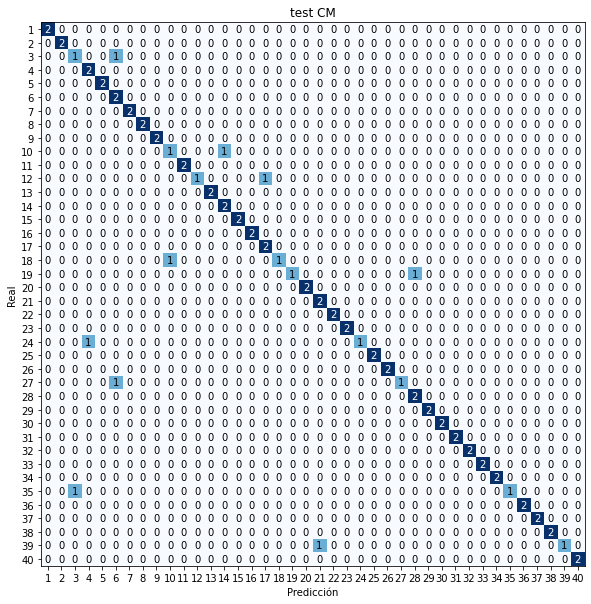

0.8875

In [55]:
run_experiment(features_df_B, cols, option='test', **best_strategy)

### Find best strategy usando Baggings

In [28]:
bagging_kwargs={
    'max_samples': 1.0,
    'max_features': 0.5,
}

In [25]:
best_acc, best_strategy = find_best_strategy(features_df, cols, COMMON_STRATEGIES,
                                             bagging=True, bagging_kwargs=bagging_kwargs)

{'method': 'SVM', 'kernel': 'rbf'}	Training...
Accuracy: train: 1.0, val: 0.625
{'method': 'SVM', 'kernel': 'linear'}	Training...
Accuracy: train: 1.0, val: 0.875
{'method': 'KNN', 'n_neighbors': 5}	Training...
Accuracy: train: 0.875, val: 0.5
{'method': 'KNN', 'n_neighbors': 5, 'weights': 'distance'}	Training...
Accuracy: train: 1.0, val: 0.5
{'method': 'KNN', 'n_neighbors': 3}	Training...
Accuracy: train: 0.9375, val: 0.5
{'method': 'KNN', 'n_neighbors': 3, 'weights': 'distance'}	Training...
Accuracy: train: 1.0, val: 0.5625
{'method': 'KNN', 'n_neighbors': 1}	Training...
Accuracy: train: 1.0, val: 0.6875
{'method': 'MLP'}	Training...
Accuracy: train: 1.0, val: 0.875
{'method': 'RF'}	Training...
Accuracy: train: 1.0, val: 0.875
{'method': 'LDA'}	Training...
Accuracy: train: 0.7708333333333334, val: 0.625


In [26]:
print(best_acc, best_strategy)

0.875 {'method': 'SVM', 'kernel': 'linear'}


Training...
Accuracy: train: 1.0, test: 0.90625


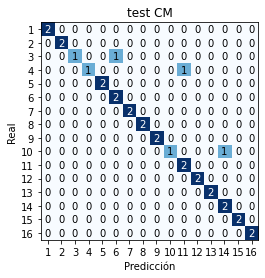

0.90625

In [27]:
run_experiment(features_df, cols, option='test', **best_strategy, bagging=True, bagging_kwargs=bagging_kwargs)

## Heatmaps

In [7]:
strategy = { 'method': 'SVM', 'kernel': 'linear' }

In [19]:
acc, cm = run_experiment(feats, cols, option='test', show_cm=False, **strategy)
acc

Training...
Accuracy: train: 1.0, test: 0.95


0.95

In [20]:
acc2, cm2 = run_experiment(feats, cols, option='val', show_cm=False, **strategy)
acc2

Training...
Accuracy: train: 1.0, val: 0.85


0.85

In [14]:
def plot_cm_sns(cm, cmap='Blues', title=None, labels=False, **kwargs):
    ticks = (np.arange(0, len(cm)) + 1) if labels else False
    sns.heatmap(cm, cmap=cmap, xticklabels=ticks, yticklabels=ticks, **kwargs)
    plt.yticks(rotation=0)
    
    if title:
        plt.title(title)

In [11]:
cm_D = cm

In [12]:
# sns.palplot(sns.color_palette("GnBu_d", reverse=True))
cmap = sns.light_palette('navy')

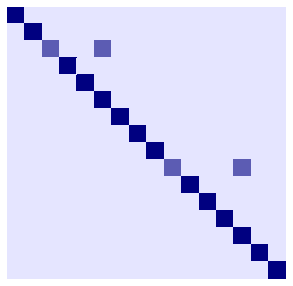

In [74]:
plt.figure(figsize=(5,5))

plot_cm_sns(cm_A, cmap=cmap, labels=False, cbar=False) # YlOrRd

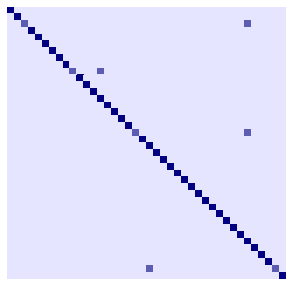

In [73]:
plt.figure(figsize=(5,5))

plot_cm_sns(cm_B, cmap=cmap, labels=False, cbar=False) # YlOrRd

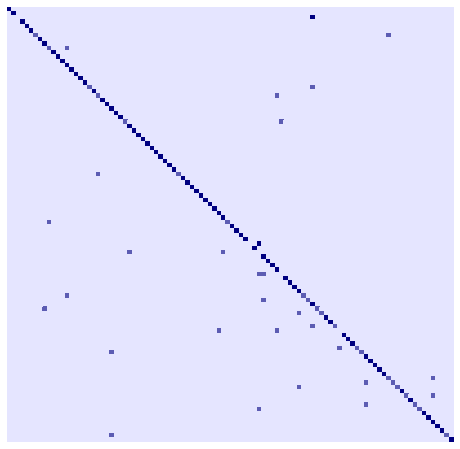

In [81]:
plt.figure(figsize=(8,8))

plot_cm_sns(cm_C, cmap=cmap, labels=False, cbar=False) # YlOrRd

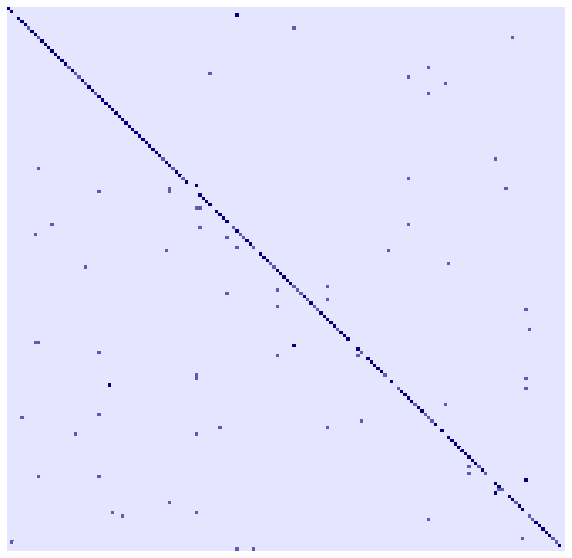

In [16]:
plt.figure(figsize=(10,10))

plot_cm_sns(cm_D, cmap=cmap, labels=False, cbar=False)